<a href="https://colab.research.google.com/github/yasarigno/NLP_DeepLearning_Course/blob/main/Exercise_Neural_Networks_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [ ]:
import random
random.seed(2)

import tensorflow as tf
tf.random.set_seed(2)

import numpy as np
np.random.seed(2)

In [ ]:
Local = False

In [ ]:
if Local:
    pizza_types = pd.read_csv('datasets/pizza_types.csv', index_col=0)
else:
    pizza_types = pd.read_csv("/content/drive/MyDrive/Shared Datasets/Pizza Types/pizza_types.csv", index_col=0)

The last 3 columns specify the pizza type:

Vegan
Vegetarian
Meat

In [ ]:
pizza_types.shape

(5520, 18)

In [ ]:
training_dataset = pizza_types.sample(frac=0.8)
testing_dataset = pizza_types[~pizza_types.index.isin(training_dataset.index)]

In [ ]:
training_dataset.shape

(4416, 18)

In [ ]:
testing_dataset.shape

(1104, 18)

In [ ]:
pizza_type_model = Sequential()

pizza_type_model.add(Dense(3, input_dim=15, activation='softmax'))

sgd = SGD()

pizza_type_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
pizza_type_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 48        
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_sgd_pizza_type_model = pizza_type_model.fit(
    training_dataset[['corn', 'olives', 'mushrooms', 'spinach', 'pineapple',
       'artichoke', 'chilli', 'pepper', 'onion', 'mozzarella', 'egg',
       'pepperoni', 'beef', 'chicken', 'bacon',]], 
    training_dataset[['vegan', 'vegetarian', 'meaty']], 
    epochs=200,
    validation_split=0.2,
)

Epoch 1/200
111/111 [==============================] - 1s 4ms/step - loss: 0.6205 - accuracy: 0.7596 - val_loss: 0.4289 - val_accuracy: 0.8756
Epoch 2/200
111/111 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.9097 - val_loss: 0.3515 - val_accuracy: 0.8959
Epoch 3/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9151 - val_loss: 0.3289 - val_accuracy: 0.8959
Epoch 4/200
111/111 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.9148 - val_loss: 0.3172 - val_accuracy: 0.8959
Epoch 5/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2651 - accuracy: 0.9148 - val_loss: 0.3086 - val_accuracy: 0.8959
Epoch 6/200
111/111 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.9148 - val_loss: 0.3011 - val_accuracy: 0.8959
Epoch 7/200
111/111 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9148 - val_loss: 0.2942 - val_accuracy: 0.8959

In [ ]:
test_loss, test_acc = pizza_type_model.evaluate(
    testing_dataset[['corn', 'olives', 'mushrooms', 'spinach', 'pineapple',
       'artichoke', 'chilli', 'pepper', 'onion', 'mozzarella', 'egg',
       'pepperoni', 'beef', 'chicken', 'bacon',]], 
    testing_dataset[['vegan', 'vegetarian', 'meaty']]
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

35/35 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.04993113502860069, accuracy = 1.0


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
pizza_type_model = Sequential()
pizza_type_model.add(Dense(3, input_dim=15, activation='softmax'))
adam = Adam()
pizza_type_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
pizza_type_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 48        
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_adam_pizza_type_model = pizza_type_model.fit(
    training_dataset[['corn', 'olives', 'mushrooms', 'spinach', 'pineapple',
       'artichoke', 'chilli', 'pepper', 'onion', 'mozzarella', 'egg',
       'pepperoni', 'beef', 'chicken', 'bacon',]], 
    training_dataset[['vegan', 'vegetarian', 'meaty']], 
    epochs=200,
    validation_split=0.2,
)

Epoch 1/200
111/111 [==============================] - 1s 4ms/step - loss: 0.7733 - accuracy: 0.6761 - val_loss: 0.5824 - val_accuracy: 0.8133
Epoch 2/200
111/111 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8933 - val_loss: 0.4204 - val_accuracy: 0.8824
Epoch 3/200
111/111 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.9142 - val_loss: 0.3639 - val_accuracy: 0.8959
Epoch 4/200
111/111 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.9156 - val_loss: 0.3373 - val_accuracy: 0.8959
Epoch 5/200
111/111 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.9153 - val_loss: 0.3200 - val_accuracy: 0.8959
Epoch 6/200
111/111 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9148 - val_loss: 0.3058 - val_accuracy: 0.8959
Epoch 7/200
111/111 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.9148 - val_loss: 0.2932 - val_accuracy: 0.8959

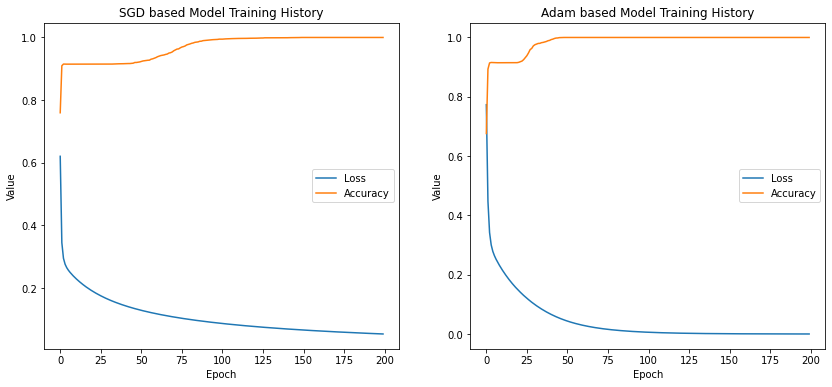

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()

axes[0].plot(history_sgd_pizza_type_model.history['loss'])
axes[0].plot(history_sgd_pizza_type_model.history['accuracy'])
axes[0].set_title('SGD based Model Training History')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Loss', 'Accuracy'], loc='center right')
axes[1].plot(history_adam_pizza_type_model.history['loss'])
axes[1].plot(history_adam_pizza_type_model.history['accuracy'])
axes[1].set_title('Adam based Model Training History')
axes[1].set_ylabel('Value')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

Loss (the blue line) - with SGD, it reaches 0 after approximately 200 iterations; however, when using Adam, it reaches 0 after around 100 iterations.

Accuracy (the orange line) reaches 100% when loss goes below 0.2. It happens more slowly with SGD, after about 75 iterations, but really fast with Adam, after only about 50 iterations.